In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## PART 2

In [2]:
# تعریف تابع واقعی (در اینجا از تابع سینوسی استفاده شده است)
def true_function1(x):
    return np.sin(x)

def true_function2(x):
    return 0.5 * x + np.sin(2 * x)

def true_function3(x):
    return np.sin(x) + 0.5 * x

# تولید داده‌های آموزشی
np.random.seed(0)
train_data = np.sort(4 * np.pi * np.random.rand(100))  # نمونه‌های تصادفی بین 0 و 4*pi
train_labels = true_function1(train_data)
train_labels2 = true_function2(train_data)
train_labels3 = true_function3(train_data)

# تبدیل داده‌ها به تنسورهای PyTorch
x_train = torch.Tensor(train_data).view(-1, 1)
y_train = torch.Tensor(train_labels).view(-1, 1)

x_train2 = torch.Tensor(train_data).view(-1, 1)
y_train2 = torch.Tensor(train_labels2).view(-1, 1)

x_train3 = torch.Tensor(train_data).view(-1, 1)
y_train3 = torch.Tensor(train_labels3).view(-1, 1)

In [3]:
# تعریف مدل MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # لایه ورودی به لایه مخفی
        self.relu = nn.ReLU()       # تابع فعال‌سازی ReLU
        self.fc2 = nn.Linear(10, 1)  # لایه مخفی به لایه خروجی

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# ایجاد مدل
model = MLP()

In [4]:
criterion = nn.MSELoss()           # تابع هدف: میانگین مربعات خطا
optimizer = optim.Adam(model.parameters(), lr=0.01)  # بهینه‌ساز: Adam با learning rate = 0.01


In [5]:

# تعداد ایپاک‌ها (epochs)
epochs = 1000
losses1 = []  # برای ذخیره خطاها
# آموزش مدل
for epoch in range(epochs):
    model.train()
    y_pred1 = model(x_train)
    loss1 = criterion(y_pred1, y_train)
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
    losses1.append(loss1.item())
    if epoch % 100 == 0:
        print(f'Training Function 1 - Epoch {epoch+1}/{epochs}, Loss: {loss1.item()}')



Training Function 1 - Epoch 1/1000, Loss: 0.5439317226409912
Training Function 1 - Epoch 101/1000, Loss: 0.37047621607780457
Training Function 1 - Epoch 201/1000, Loss: 0.35924866795539856
Training Function 1 - Epoch 301/1000, Loss: 0.35916346311569214
Training Function 1 - Epoch 401/1000, Loss: 0.35915276408195496
Training Function 1 - Epoch 501/1000, Loss: 0.3591417074203491
Training Function 1 - Epoch 601/1000, Loss: 0.3591330349445343
Training Function 1 - Epoch 701/1000, Loss: 0.3591330349445343
Training Function 1 - Epoch 801/1000, Loss: 0.3591330349445343
Training Function 1 - Epoch 901/1000, Loss: 0.3591330051422119


In [6]:
epochs = 1000
losses2 = []  # برای ذخیره خطاها
# آموزش مدل بر روی تابع دوم
for epoch in range(epochs):
    model.train()
    y_pred2 = model(x_train2)
    loss2 = criterion(y_pred2, y_train2)
    optimizer.zero_grad()
    loss2.backward()
    optimizer.step()
    losses2.append(loss2.item())
    if epoch % 100 == 0:
        print(f'Training Function 2 - Epoch {epoch+1}/{epochs}, Loss: {loss2.item()}')

Training Function 2 - Epoch 1/1000, Loss: 12.405129432678223
Training Function 2 - Epoch 101/1000, Loss: 0.47852078080177307
Training Function 2 - Epoch 201/1000, Loss: 0.47066670656204224
Training Function 2 - Epoch 301/1000, Loss: 0.4671372175216675
Training Function 2 - Epoch 401/1000, Loss: 0.4649313986301422
Training Function 2 - Epoch 501/1000, Loss: 0.46382343769073486
Training Function 2 - Epoch 601/1000, Loss: 0.4632132053375244
Training Function 2 - Epoch 701/1000, Loss: 0.46289753913879395
Training Function 2 - Epoch 801/1000, Loss: 0.4627516567707062
Training Function 2 - Epoch 901/1000, Loss: 0.4625687897205353


In [7]:
epochs = 1000
losses3 = []  # برای ذخیره خطاها
# آموزش مدل بر روی تابع سوم
for epoch in range(epochs):
    model.train()
    y_pred3 = model(x_train3)
    loss3 = criterion(y_pred3, y_train3)
    optimizer.zero_grad()
    loss3.backward()
    optimizer.step()
    losses3.append(loss3.item())
    if epoch % 100 == 0:
        print(f'Training Function 3 - Epoch {epoch+1}/{epochs}, Loss: {loss3.item()}')

Training Function 3 - Epoch 1/1000, Loss: 0.470459520816803
Training Function 3 - Epoch 101/1000, Loss: 0.3594290018081665
Training Function 3 - Epoch 201/1000, Loss: 0.3589724600315094
Training Function 3 - Epoch 301/1000, Loss: 0.35893359780311584
Training Function 3 - Epoch 401/1000, Loss: 0.3588963449001312
Training Function 3 - Epoch 501/1000, Loss: 0.35886508226394653
Training Function 3 - Epoch 601/1000, Loss: 0.3588390350341797
Training Function 3 - Epoch 701/1000, Loss: 0.3588179349899292
Training Function 3 - Epoch 801/1000, Loss: 0.3587980270385742
Training Function 3 - Epoch 901/1000, Loss: 0.3587789833545685


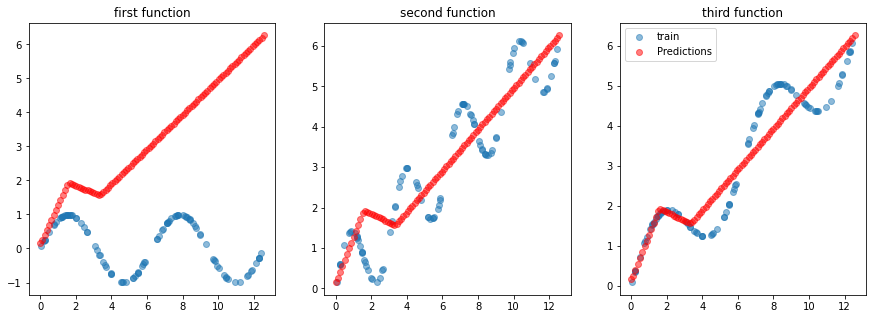

In [8]:
model.eval()

test_data = np.linspace(0, 4 * np.pi, 100)  # نقاط به طور مساوی انتخاب شده برای آزمایش
x_test = torch.Tensor(test_data).view(-1, 1)
x_test_tensor = torch.Tensor(x_test).view(-1, 1)

# پیش‌بینی مقادیر برای هر تابع
y_pred_test1 = model(x_test_tensor).detach().numpy()
y_pred_test2 = model(x_test_tensor).detach().numpy()
y_pred_test3 = model(x_test_tensor).detach().numpy()

# نمایش نتایج
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x_train, y_train, label='train', alpha=0.5)
plt.scatter(x_test, y_pred_test1, label='Predictions', color='red', alpha=0.5)
plt.title('first function')

plt.subplot(1, 3, 2)
plt.scatter(x_train2, y_train2, label='train', alpha=0.5)
plt.scatter(x_test, y_pred_test2, label='Predictions', color='red', alpha=0.5)
plt.title('second function')

plt.subplot(1, 3, 3)
plt.scatter(x_train3, y_train3, label='train', alpha=0.5)
plt.scatter(x_test, y_pred_test3, label='Predictions', color='red', alpha=0.5)
plt.title('third function')

plt.legend()
plt.show()

In [9]:

# محاسبه میزان خطا
final_loss1 = losses1[-1]
mae = np.mean(np.abs(true_function1(test_data) - y_pred_test1.flatten()))  
mse = np.mean((true_function1(test_data) - y_pred_test1.flatten())**2)  

# چاپ مقادیر خطاها
print(f'The final value of the error for function 1: {final_loss1}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')

final_loss2 = losses2[-1]
mae = np.mean(np.abs(true_function1(test_data) - y_pred_test2.flatten()))  
mse = np.mean((true_function1(test_data) - y_pred_test2.flatten())**2)  
print(f'The final value of the error for function 1: {final_loss2}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')

final_loss3 = losses3[-1]
mae = np.mean(np.abs(true_function1(test_data) - y_pred_test3.flatten()))  
mse = np.mean((true_function1(test_data) - y_pred_test3.flatten())**2)  
print(f'The final value of the error for function 1: {final_loss3}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')

The final value of the error for function 1: 0.3591330349445343
MAE (Mean Absolute Error): 3.242926050722599
MSE (Mean Squared Error): 14.461220477368832
The final value of the error for function 1: 0.46248042583465576
MAE (Mean Absolute Error): 3.242926050722599
MSE (Mean Squared Error): 14.461220477368832
The final value of the error for function 1: 0.35876092314720154
MAE (Mean Absolute Error): 3.242926050722599
MSE (Mean Squared Error): 14.461220477368832


## PART 3

Training Function 1 - Epoch 1/1000, Loss: 1.300615668296814
Training Function 1 - Epoch 101/1000, Loss: 0.43801772594451904
Training Function 1 - Epoch 201/1000, Loss: 0.335984468460083
Training Function 1 - Epoch 301/1000, Loss: 0.27146875858306885
Training Function 1 - Epoch 401/1000, Loss: 0.23329488933086395
Training Function 1 - Epoch 501/1000, Loss: 0.20360413193702698
Training Function 1 - Epoch 601/1000, Loss: 0.17996715009212494
Training Function 1 - Epoch 701/1000, Loss: 0.1650603711605072
Training Function 1 - Epoch 801/1000, Loss: 0.15513092279434204
Training Function 1 - Epoch 901/1000, Loss: 0.14819325506687164
Training Function 2 - Epoch 1/1000, Loss: 12.942723274230957
Training Function 2 - Epoch 101/1000, Loss: 0.48049119114875793
Training Function 2 - Epoch 201/1000, Loss: 0.46202385425567627
Training Function 2 - Epoch 301/1000, Loss: 0.4435254633426666
Training Function 2 - Epoch 401/1000, Loss: 0.42951104044914246
Training Function 2 - Epoch 501/1000, Loss: 0.41976

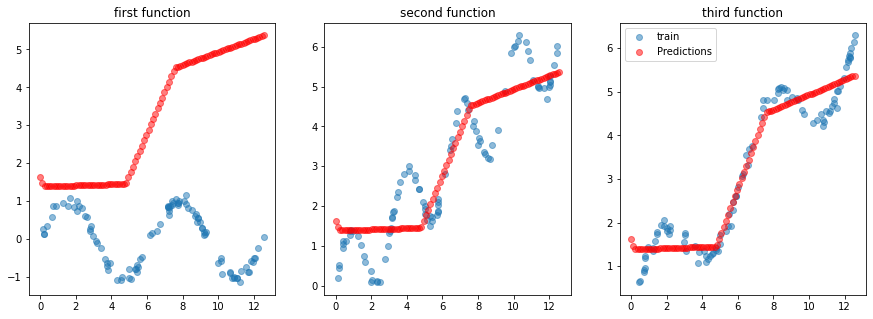

In [10]:

# تعریف توابع
def true_function1(x):
    return np.sin(x)

def true_function2(x):
    return 0.5 * x + np.sin(2 * x)

def true_function3(x):
    return np.sin(x) + 0.5 * x

# تولید داده‌های آموزشی
def generate_data(func, num_samples, noise_std):
    x = np.sort(4 * np.pi * np.random.rand(num_samples))  # نمونه‌های تصادفی بین 0 و 4*pi
    y = func(x) + noise_std * np.random.randn(num_samples)  # افزودن نویز
    return x, y

# تولید داده‌های آموزشی برای هر تابع
num_samples = 100
noise_std = 0.1

x_train1, y_train1 = generate_data(true_function1, num_samples, noise_std)
x_train2, y_train2 = generate_data(true_function2, num_samples, noise_std)
x_train3, y_train3 = generate_data(true_function3, num_samples, noise_std)

# تبدیل داده‌ها به تنسورهای PyTorch
x_train1 = torch.Tensor(x_train1).view(-1, 1)
y_train1 = torch.Tensor(y_train1).view(-1, 1)

x_train2 = torch.Tensor(x_train2).view(-1, 1)
y_train2 = torch.Tensor(y_train2).view(-1, 1)

x_train3 = torch.Tensor(x_train3).view(-1, 1)
y_train3 = torch.Tensor(y_train3).view(-1, 1)

# ایجاد مدل MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# مقداردهی اولیه به مدل، تابع هدف و بهینه‌ساز
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# آموزش مدل بر روی تابع اول
epochs = 1000
losses1 = []  # برای ذخیره خطاها
losses2 = []  # برای ذخیره خطاها
losses3 = []  # برای ذخیره خطاها
for epoch in range(epochs):
    model.train()
    y_pred1 = model(x_train1)
    loss1 = criterion(y_pred1, y_train1)
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
    losses1.append(loss1.item())
    if epoch % 100 == 0:
        print(f'Training Function 1 - Epoch {epoch+1}/{epochs}, Loss: {loss1.item()}')

# آموزش مدل بر روی تابع دوم
for epoch in range(epochs):
    model.train()
    y_pred2 = model(x_train2)
    loss2 = criterion(y_pred2, y_train2)
    optimizer.zero_grad()
    loss2.backward()
    optimizer.step()
    losses2.append(loss2.item())
    if epoch % 100 == 0:
        print(f'Training Function 2 - Epoch {epoch+1}/{epochs}, Loss: {loss2.item()}')

# آموزش مدل بر روی تابع سوم
for epoch in range(epochs):
    model.train()
    y_pred3 = model(x_train3)
    loss3 = criterion(y_pred3, y_train3)
    optimizer.zero_grad()
    loss3.backward()
    optimizer.step()
    losses3.append(loss3.item())
    if epoch % 100 == 0:
        print(f'Training Function 3 - Epoch {epoch+1}/{epochs}, Loss: {loss3.item()}')

# ارزیابی مدل بر روی داده‌های آزمایشی
model.eval()

# تولید داده‌های آزمایشی برای هر تابع
x_test = np.linspace(0, 4 * np.pi, 100)
x_test_tensor = torch.Tensor(x_test).view(-1, 1)

# پیش‌بینی مقادیر برای هر تابع
y_pred_test1 = model(x_test_tensor).detach().numpy()
y_pred_test2 = model(x_test_tensor).detach().numpy()
y_pred_test3 = model(x_test_tensor).detach().numpy()

# نمایش نتایج
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x_train1, y_train1, label='train', alpha=0.5)
plt.scatter(x_test, y_pred_test1, label='Predictions', color='red', alpha=0.5)
plt.title('first function')

plt.subplot(1, 3, 2)
plt.scatter(x_train2, y_train2, label='train', alpha=0.5)
plt.scatter(x_test, y_pred_test2, label='Predictions', color='red', alpha=0.5)
plt.title('second function')

plt.subplot(1, 3, 3)
plt.scatter(x_train3, y_train3, label='train', alpha=0.5)
plt.scatter(x_test, y_pred_test3, label='Predictions', color='red', alpha=0.5)
plt.title('third function')

plt.legend()
plt.show()

In [11]:
# محاسبه میزان خطا
final_loss1 = losses1[-1]
mae = np.mean(np.abs(true_function1(test_data) - y_pred_test1.flatten()))  
mse = np.mean((true_function1(test_data) - y_pred_test1.flatten())**2)  

# چاپ مقادیر خطاها
print(f'The final value of the error for function 1: {final_loss1}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')

final_loss2 = losses2[-1]
mae = np.mean(np.abs(true_function1(test_data) - y_pred_test2.flatten()))  
mse = np.mean((true_function1(test_data) - y_pred_test2.flatten())**2)  
print(f'The final value of the error for function 1: {final_loss2}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')

final_loss3 = losses3[-1]
mae = np.mean(np.abs(true_function1(test_data) - y_pred_test3.flatten()))  
mse = np.mean((true_function1(test_data) - y_pred_test3.flatten())**2)  
print(f'The final value of the error for function 1: {final_loss3}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')

The final value of the error for function 1: 0.14417438209056854
MAE (Mean Absolute Error): 3.172438087463379
MSE (Mean Squared Error): 13.505263369918982
The final value of the error for function 1: 0.4077712595462799
MAE (Mean Absolute Error): 3.172438087463379
MSE (Mean Squared Error): 13.505263369918982
The final value of the error for function 1: 0.1535293161869049
MAE (Mean Absolute Error): 3.172438087463379
MSE (Mean Squared Error): 13.505263369918982


## PART 4

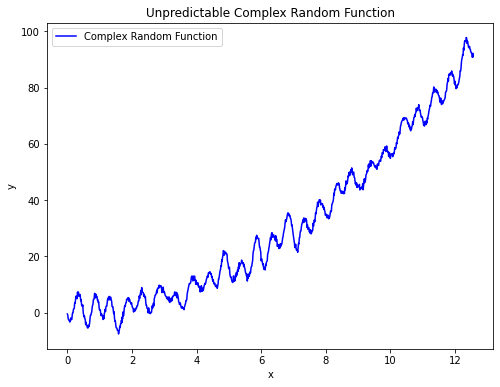

In [12]:
# تولید یک تابع تصادفی پیچیده‌تر و غیر قابل پیش‌بینی
def complex_random_function(x):
    num_terms = np.random.randint(5, 10)  # تعداد توابع تصادفی
    result = np.zeros_like(x)

    for _ in range(num_terms):
        amplitude = np.random.uniform(0.5, 2.0)
        frequency = np.random.uniform(0.5, 3.0)
        phase_shift = np.random.uniform(0, 2 * np.pi)

        result += amplitude * np.sin(2 * np.pi * frequency * x + phase_shift)

    result += 0.5 * x**2  # افزودن یک ترم دوجمله‌ای
    result += 0.5 * np.random.normal(size=len(x))  # افزودن نویز بیشتر

    # اضافه کردن یک ضریب اسکیلینگ تصادفی برای متغیریت بیشتر
    result *= np.random.uniform(0.5, 2.0)

    return result

# تولید داده‌های تابع تصادفی پیچیده
x_complex = np.linspace(0, 4 * np.pi, 1000)
y_complex = complex_random_function(x_complex)

# نمایش تابع تصادفی پیچیده
plt.figure(figsize=(8, 6))
plt.plot(x_complex, y_complex, label='Complex Random Function', color='blue')
plt.title('Unpredictable Complex Random Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

epoch 1/1000, error: 1065.4736328125
epoch 101/1000, error: 62.60830307006836
epoch 201/1000, error: 31.877361297607422
epoch 301/1000, error: 31.82147216796875
epoch 401/1000, error: 31.704879760742188
epoch 501/1000, error: 31.441978454589844
epoch 601/1000, error: 30.87163734436035
epoch 701/1000, error: 29.757511138916016
epoch 801/1000, error: 28.08194923400879
epoch 901/1000, error: 26.285066604614258


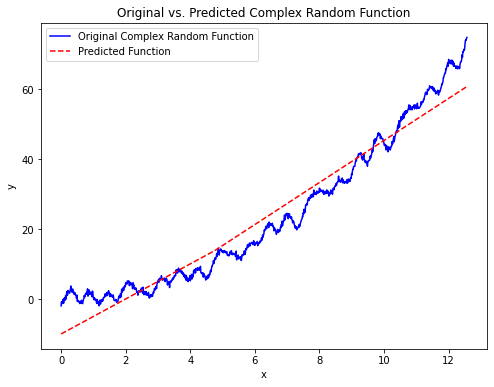

In [13]:
# تولید داده‌های تابع تصادفی پیچیده
x_data = np.linspace(0, 4 * np.pi, 1000)
y_data = complex_random_function(x_data)

# تبدیل داده‌ها به تنسورهای PyTorch
x_tensor = torch.Tensor(x_data).view(-1, 1)
y_tensor = torch.Tensor(y_data).view(-1, 1)

# تعریف یک مدل ساده شبکه عصبی
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# ایجاد نمونه از مدل، تابع هدف، و بهینه‌ساز
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# آموزش شبکه عصبی
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'epoch {epoch+1}/{epochs}, error: {loss.item()}')

# ارزیابی مدل آموزش دیده
model.eval()
with torch.no_grad():
    y_pred_tensor = model(x_tensor).detach().numpy()

# نمایش تابع اصلی و تابع پیش‌بینی شده
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, label='Original Complex Random Function', color='blue')
plt.plot(x_data, y_pred_tensor, label='Predicted Function', linestyle='dashed', color='red')
plt.title('Original vs. Predicted Complex Random Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()